Este cuadernillo contiene todo el c√≥digo empleado para realizar la parte de nuestro TFM relativa al an√°lisis del dataset Youtube Video Trending Dataset. Incluye las siguientes secciones:

- Instalaci√≥n de subprogramas y librer√≠as
- Preprocesamiento de los datos
- Obtenci√≥n y an√°lisis de caracter√≠sticas de los datos

## Instalaci√≥n de subprogramas y librer√≠as

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import isodate #para manejar formato de duraci√≥n ISO 8601
import re #para manejar expresiones regulares
from textblob import TextBlob

## Preprocesamiento de datos

In [2]:
# PASO 1: LECTURA DEL ARCHIVO
df = pd.read_csv("videos_virales_final_cleaned.csv", low_memory=False)

In [3]:
# El primer paso del preprocesado es eliminar columnas que consideramos innecesarias para el estudio. Estas son: 
# channel_id,video_dimension, channel_have_hidden_subscribers, channel_localized_title, channel_localized_description
elim_columns = ['channel_id','video_dimension', 'channel_have_hidden_subscribers', 'channel_localized_title', 'channel_localized_description']
df = df.drop(columns=elim_columns)

In [4]:
#Debemos eliminar las filas con video_id nulo, ya que esa ser√° la variable principal para la identificaci√≥n de los v√≠deos.
#Seg√∫n los metadatos ofrecidos por Kaggle, hay 13 instancias de ese tipo.
df = df.dropna(subset=['video_id'])

In [5]:
#A continuaci√≥n trataremos el resto de valores NaN.
#Para columnas alfanum√©ricas (string), cambiar por ""
#Para columnas num√©ricas,
alfanumeric_values = {"video_trending_country": "", "video_description": "", "video_category_id": "", "video_tags": ""}

#de momento no

In [6]:
#Guardamos el dataset resultante en un csv para evitar repetir el proceso
df.to_csv('ytvg_clean.csv', index=False)

In [7]:
#Creamos un dataset auxiliar que contenga solamente una instancia de cada v√≠deo. Es decir, deber√° tener unas 180.000 instancias.
df_unique = df.drop_duplicates(subset=['video_id'], keep='first')
df_unique.to_csv('ytvg_unique.csv', index=False)

## Obtenci√≥n y an√°lisis de caracter√≠sticas

In [8]:
df = pd.read_csv("ytvg_unique.csv")

In [9]:
df.columns

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'video_title', 'video_description',
       'video_default_thumbnail', 'video_category_id', 'video_tags',
       'video_duration', 'video_definition', 'video_licensed_content',
       'video_view_count', 'video_like_count', 'video_comment_count',
       'channel_title', 'channel_description', 'channel_custom_url',
       'channel_published_at', 'channel_country', 'channel_view_count',
       'channel_subscriber_count', 'channel_video_count', 'thumbnail_url_hq',
       'thumbnail_faces_count', 'title_length', 'title_word_count',
       'title_has_exclamation', 'title_has_question', 'title_sentiment',
       'title_has_keywords', 'title_uppercase_ratio', 'description_length',
       'description_sentiment', 'has_external_links', 'tag_count',
       'video_duration_sec', 'published_at', 'hour_of_day', 'day_of_week',
       'is_weekend', 'is_peak_hour', 'thumbnail_text_count',
       'thumbnail

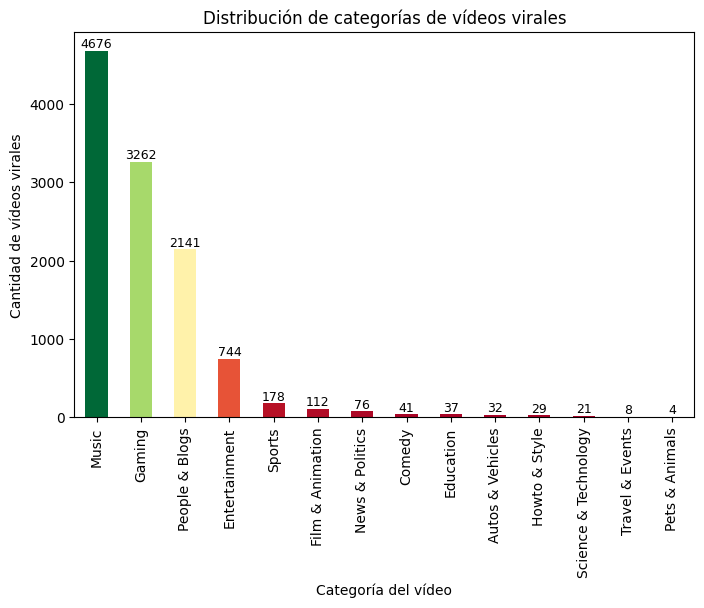

In [10]:
#An√°lisis de categor√≠as
categories = df['video_category_id'].value_counts()
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribuci√≥n de categor√≠as de v√≠deos virales")
plt.xlabel("Categor√≠a del v√≠deo")
plt.ylabel("Cantidad de v√≠deos virales")
plt.xticks(rotation=90)

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

In [11]:
#An√°lisis de duraci√≥n. Formato de la duraci√≥n: ISO 8601
#Transformar todas las duraciones a segundos.
df["video_duration_segs"] = df["video_duration"].apply(lambda x: int(isodate.parse_duration(x).total_seconds()))
df["video_duration_segs"].describe()

count    11371.000000
mean      2746.164453
std       6241.279159
min          9.000000
25%        192.000000
50%        350.000000
75%       1520.000000
max      73561.000000
Name: video_duration_segs, dtype: float64

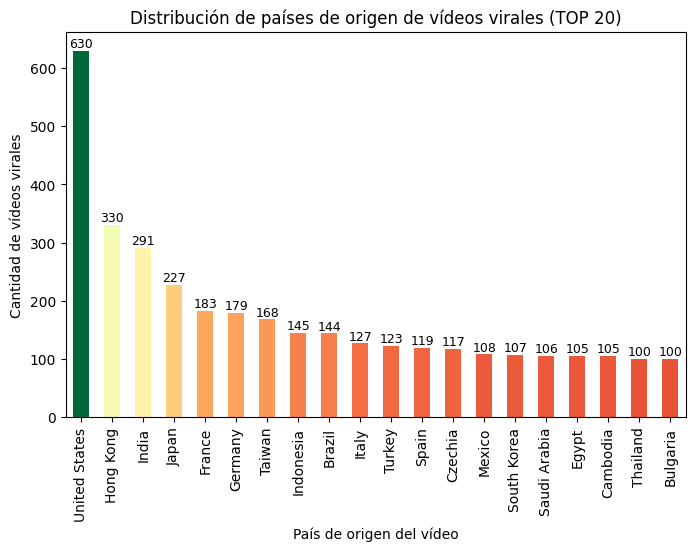

In [12]:
#Pa√≠s de origen de los v√≠deos
categories = df['channel_country'].value_counts()
categories = categories[0:20]
plt.figure(figsize=(8,5))
bars = categories.plot(kind='bar', color=plt.cm.RdYlGn(categories/categories.max()))

plt.title(f"Distribuci√≥n de pa√≠ses de origen de v√≠deos virales (TOP 20)")
plt.xlabel("Pa√≠s de origen del v√≠deo")
plt.ylabel("Cantidad de v√≠deos virales")
plt.xticks(rotation=90)

for i, value in enumerate(categories):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.show()

In [13]:
#An√°lisis de t√≠tulo (idioma, tama√±o, emojis)

In [14]:
#Ratio visitas-suscriptores

## Preprocesamiento t√≠tulos - an√°lisis de sentimientos

In [15]:
#funcion para extraer algunas caracter√≠sticas del t√≠tulo
def extract_features(df):
    df['title_length'] = df['video_title'].apply(lambda x: len(str(x)))
    df['title_word_count'] = df['video_title'].apply(lambda x: len(str(x).split()))
    df['title_has_exclamation'] = df['video_title'].apply(lambda x: '!' in str(x))
    df['title_has_question'] = df['video_title'].apply(lambda x: '?' in str(x))
    df['title_sentiment'] = df['video_title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    df['description_length'] = df['video_description'].apply(lambda x: len(str(x)))
    df['description_sentiment'] = df['video_description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    return df

In [16]:
df_preproc = df
df_preproc = extract_features(df_preproc)

# 2. Eliminar columnas irrelevantes y peligrosas para evitar fuga de datos

# Explicaci√≥n:
# Eliminamos identificadores, URLs, descripciones redundantes, el target y cualquier variable derivada del target.
# As√≠ evitamos fuga de datos y aseguramos que el modelo solo use informaci√≥n disponible antes de saber si un v√≠deo es viral.
# No eliminamos variables originales del v√≠deo/canal ni features extra√≠das del texto.

# Preprocesado para predicci√≥n antes de publicar
# Elimina TODAS las variables de interacci√≥n y m√©tricas post-publicaci√≥n
cols_to_drop = [
    'video_id', 'channel_id', 'video_default_thumbnail', 'thumbnail_url_hq',
    'channel_title', 'channel_description', 'channel_custom_url',
    'channel_localized_title', 'channel_localized_description', 'published_at',
    'is_viral', 'viral_score',  # targets
    'video_view_count', 'video_like_count', 'video_comment_count',
    'views_per_second', 'likes_per_view', 'likes_per_sub', 'views_per_sub',
    'channel_view_count', 'channel_subscriber_count', 'channel_video_count'
]
cols_to_drop += ['video_tags', 'channel_country']
df_preproc_clf = df.copy()
df_preproc_clf = extract_features(df_preproc_clf)
df_preproc_clf.drop(columns=[col for col in cols_to_drop if col in df_preproc_clf.columns], inplace=True)

# Imputar nulos y codificar categ√≥ricas
num_cols = df_preproc_clf.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_preproc_clf.select_dtypes(include='object').columns
for col in cat_cols:
    df_preproc_clf[col] = df_preproc_clf[col].fillna('Unknown')
    from sklearn.preprocessing import LabelEncoder
    df_preproc_clf[col] = LabelEncoder().fit_transform(df_preproc_clf[col])
for col in num_cols:
    df_preproc_clf[col] = df_preproc_clf[col].fillna(df_preproc_clf[col].median())
cat_cols = df_preproc_clf.select_dtypes(include='object').columns
for col in cat_cols:
    df_preproc_clf[col] = df_preproc_clf[col].fillna('Unknown')

# Estandarizar num√©ricas
from sklearn.preprocessing import StandardScaler
num_cols = df_preproc_clf.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_preproc_clf[num_cols] = scaler.fit_transform(df_preproc_clf[num_cols])

In [17]:
df_preproc

video_id    video_published_at video_trending__date  \
0      2ttVjSrLEZE  2024-10-02T15:00:27Z           2024.10.12   
1      cyCfVb0_FZg  2024-09-26T16:00:22Z           2024.10.12   
2      O2XDDmyuycw  2024-09-27T07:00:06Z           2024.10.12   
3      IoHXh4oGZM8  2024-09-22T08:08:44Z           2024.10.12   
4      nPBCrqxz30w  2024-09-17T16:00:45Z           2024.10.12   
...            ...                   ...                  ...   
11366  QU_BbKjhqvU  2025-08-13T10:45:15Z           2025.08.13   
11367  uEL7YaEmIfI  2025-08-13T07:02:26Z           2025.08.13   
11368  uu0lAVK7S8k  2025-08-13T13:08:33Z           2025.08.13   
11369  -esUfP27zzA  2025-08-13T11:01:56Z           2025.08.13   
11370  9s9udzVZcmk  2025-08-11T06:51:53Z           2025.08.13   

       video_trending_country  \
0        United Arab Emirates   
1                    Bulgaria   
2                    Bulgaria   
3      Bosnia and Herzegovina   
4      Bosnia and Herzegovina   
...                       ...   
11366                Cambodia   
11367                Cambodia   
11368                Cambodia   
11369                Cambodia   
11370                Cambodia   

                                             video_title  \
0      Ayed - Ma Hada Bali | Official Music Video 202...   
1      SHUNAKA - Mr.DaiMiPariteSi [OFFICIAL 4K VIDEO]...   
2                           Robi - –¢–∏—Ö–æ (Official Video)   
3                                     September 22, 2024   
4                               Ja sa 32  i 102  godineüòÇ   
...                                                  ...   
11366   ·ûá·ûΩ·ûî·ûÇ·üí·ûì·û∂·ûá·û∂·ûê·üí·ûò·û∏? ·û¢·ûè·üí·ûê·ûî·üí·ûö·ûô·üÑ·ûá·ûì·üç·ûü·ûè·üí·ûú Grow a garden ü™¥    
11367  üî¥ LIVE | GTA5 ·ûá·ûΩ·ûô·ûä·ûπ·ûÄ·ûá·ûâ·üí·ûá·ûº·ûì·û¢·û∏·ûú·û∂·ûì·üã·ûï·üí·ûë·üá·ûÇ·üÅ ·ûá·ûΩ·ûô·ûò·ûæ·ûõ·ûõ...   
11368                                  KOLYOK ·ûò·ûÄ·û†·ûæ·ûô·ûò·ûÄ·û†·ûæ·ûô   
11369              Welcome To My Live Guy i'm back !!!!!   
11370  EP5 ·ûó·û∂·ûñ·ûá·üÑ·ûÇ·ûá·üê·ûô ·ûö·ûî·ûü·üã·û†·üí·ûÇ·üÅ·ûò Garena Free Fire | Sid...   

                                       video_description  \
0      ŸÑŸÑÿ•ÿ¥ÿ™ÿ±ÿßŸÉ ŸÅŸä ÿßŸÑŸÇŸÜÿßÿ© | https://rb.gy/7wjde8\nŸÑŸÑÿß...   
1      Subscribe to Shunaka: https://bit.ly/3Mt8U6h\n...   
2      "–¢–∏—Ö–æ, —Ç–∏—Ö–æ, —Ç–∏—Ö–æ... –æ—Å—Ç–∞–≤–∞–º —Å —Ç–µ–±–µ"\n\n–ü—ä—Ä–≤–∞ ...   
3                                                    NaN   
4      Dobro do≈°li u ≈æivot jedne proseƒçne balkanske p...   
...                                                  ...   
11366  Hello everyone welcome to my channel I‚Äôm back ...   
11367  PayWay Link : https://link.payway.com.kh/ABAPA...   
11368  ·ûî·ûæ·ûü·üí·ûö·û°·û∂·ûâ·üã·ûÖ·ûº·ûõ·ûÖ·û∑·ûè·üí·ûè ·ûü·ûº·ûò·ûÖ·ûª·ûÖ Subscribe ·ûì·û∑·ûÑ like vi...   
11369  ----------------------------------------------...   
11370  ·ûú·û∏·ûä·üÅ·û¢·ûº·ûì·üÅ·üá ·ûô·ûæ·ûÑ·ûò·ûÄ·ûä·ûπ·ûÑ·û¢·üÜ·ûñ·û∏·ûó·û∂·ûñ·ûá·üÑ·ûÇ·ûá·üê·ûô‚Äã·ûö·ûî·ûü·üã·û†·üí·ûÇ·üÅ·ûò Free...   

                                 video_default_thumbnail video_category_id  \
0         https://i.ytimg.com/vi/2ttVjSrLEZE/default.jpg             Music   
1         https://i.ytimg.com/vi/cyCfVb0_FZg/default.jpg             Music   
2         https://i.ytimg.com/vi/O2XDDmyuycw/default.jpg             Music   
3         https://i.ytimg.com/vi/IoHXh4oGZM8/default.jpg     Entertainment   
4         https://i.ytimg.com/vi/nPBCrqxz30w/default.jpg    People & Blogs   
...                                                  ...               ...   
11366     https://i.ytimg.com/vi/QU_BbKjhqvU/default.jpg            Gaming   
11367     https://i.ytimg.com/vi/uEL7YaEmIfI/default.jpg            Gaming   
11368  https://i.ytimg.com/vi/uu0lAVK7S8k/default_liv...            Gaming   
11369  https://i.ytimg.com/vi/-esUfP27zzA/default_liv...    People & Blogs   
11370     https://i.ytimg.com/vi/9s9udzVZcmk/default.jpg     Entertainment   

                                              video_tags video_duration  ...  \

## Predicci√≥n de viralidad antes de publicar el v√≠deo

En este enfoque, el modelo solo utilizar√° informaci√≥n disponible antes de la publicaci√≥n (t√≠tulo, descripci√≥n, categor√≠a, duraci√≥n, horario, etc.) para predecir si un v√≠deo ser√° viral. Se eliminan todas las variables de interacci√≥n y m√©tricas que solo se conocen tras la publicaci√≥n.

In [32]:
# Definir X e y para regresi√≥n (viral_score)

# Eliminar filas con NaN en viral_score para evitar errores en el entrenamiento
df = df[~df['viral_score'].isna()]
y_reg = df['viral_score']
X_reg = df_preproc_clf.loc[df.index].copy()

from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print('Shape X_train:', X_train_reg.shape)
print('Shape y_train:', y_train_reg.shape)

Shape X_train: (9021, 30)
Shape y_train: (9021,)


In [33]:
# Modelos de regresi√≥n y evaluaci√≥n
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

models_reg = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(random_state=42, n_jobs=-1),
    'MLPRegressor': MLPRegressor(random_state=42, max_iter=3000)
}

for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred)
    rmse = root_mean_squared_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    print(f'{name} - MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}')

LinearRegression - MAE: 2030.508, RMSE: 4911.898, R2: -0.150
RandomForest - MAE: 1122.201, RMSE: 6705.693, R2: -1.143
RandomForest - MAE: 1122.201, RMSE: 6705.693, R2: -1.143
XGBoost - MAE: 803.460, RMSE: 4610.238, R2: -0.013
XGBoost - MAE: 803.460, RMSE: 4610.238, R2: -0.013
MLPRegressor - MAE: 2317.579, RMSE: 6102.156, R2: -0.775
MLPRegressor - MAE: 2317.579, RMSE: 6102.156, R2: -0.775


c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Optimizaci√≥n y validaci√≥n de modelos de regresi√≥n
En esta secci√≥n se implementan:
- B√∫squeda de hiperpar√°metros con GridSearchCV/RandomizedSearchCV.
- Validaci√≥n cruzada con m√©tricas de regresi√≥n (RMSE).
- An√°lisis de importancia de variables.

In [34]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
# Optimizaci√≥n de hiperpar√°metros para RandomForest (regresi√≥n)
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                              param_distributions=param_dist_rf, n_iter=10, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, random_state=42)
rf_search.fit(X_train_reg, y_train_reg)
print('Mejores hiperpar√°metros RandomForest:', rf_search.best_params_)

Mejores hiperpar√°metros RandomForest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}


RandomForest optimizado - MAE: 1222.521, RMSE: 7308.812, R2: -1.546


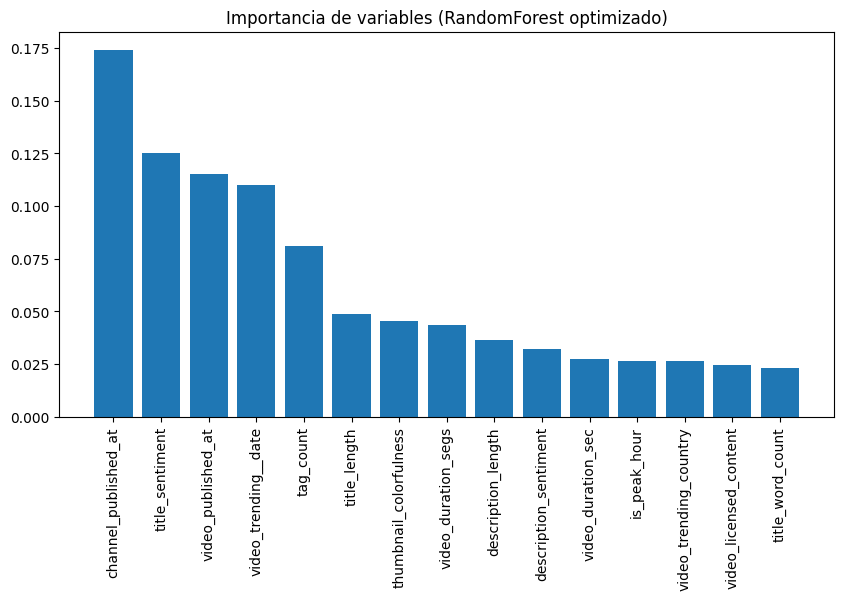

feature  importance
9     channel_published_at    0.174081
15         title_sentiment    0.124935
0       video_published_at    0.115193
1     video_trending__date    0.110057
21               tag_count    0.081049
11            title_length    0.048602
28  thumbnail_colorfulness    0.045269
29     video_duration_segs    0.043234
18      description_length    0.036516
19   description_sentiment    0.031833
22      video_duration_sec    0.027293
26            is_peak_hour    0.026476
2   video_trending_country    0.026308
8   video_licensed_content    0.024337
12        title_word_count    0.023009

In [39]:
# Usar el mejor modelo encontrado por RandomizedSearchCV para predecir y evaluar
best_rf = rf_search.best_estimator_
y_pred_best = best_rf.predict(X_test_reg)
mae_best = mean_absolute_error(y_test_reg, y_pred_best)
rmse_best = root_mean_squared_error(y_test_reg, y_pred_best)
r2_best = r2_score(y_test_reg, y_pred_best)
print(f"RandomForest optimizado - MAE: {mae_best:.3f}, RMSE: {rmse_best:.3f}, R2: {r2_best:.3f}")

# Importancia de variables con el mejor modelo
importances_best = best_rf.feature_importances_
features_best = X_train_reg.columns
imp_df_best = pd.DataFrame({'feature': features_best, 'importance': importances_best}).sort_values('importance', ascending=False)
plt.figure(figsize=(10,5))
plt.bar(imp_df_best['feature'][:15], imp_df_best['importance'][:15])
plt.xticks(rotation=90)
plt.title('Importancia de variables (RandomForest optimizado)')
plt.show()
display(imp_df_best.head(15))

### Validaci√≥n cruzada y curva de aprendizaje (regresi√≥n)
A continuaci√≥n se implementan mejoras para validar la robustez del modelo:
- Validaci√≥n cruzada (cross-validation) para obtener m√©tricas m√°s robustas (RMSE).
- Curva de aprendizaje para detectar overfitting/underfitting.

In [40]:
# Validaci√≥n cruzada para RandomForest
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
scores = cross_val_score(rf, X_reg, y_reg, cv=5, scoring='neg_root_mean_squared_error')
print(f'RandomForest RMSE CV: {-scores.mean():.3f} ¬± {scores.std():.3f}')

RandomForest RMSE CV: 23943.103 ¬± 23138.115


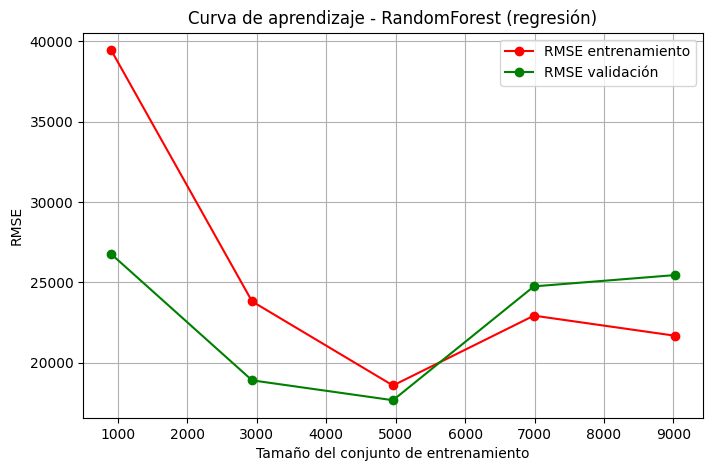

In [36]:
from sklearn.model_selection import learning_curve
import numpy as np

# Curva de aprendizaje para RandomForest (regresi√≥n)
# Si rf_search no est√° definido, entrenar un RandomForestRegressor b√°sico para la curva de aprendizaje
try:
    estimator = rf_search.best_estimator_
except NameError:
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(random_state=42, n_jobs=-1)
    estimator.fit(X_train_reg, y_train_reg)

train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_reg, y_reg, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='RMSE entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='RMSE validaci√≥n')
plt.title('Curva de aprendizaje - RandomForest (regresi√≥n)')
plt.xlabel('Tama√±o del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.grid()
plt.show()

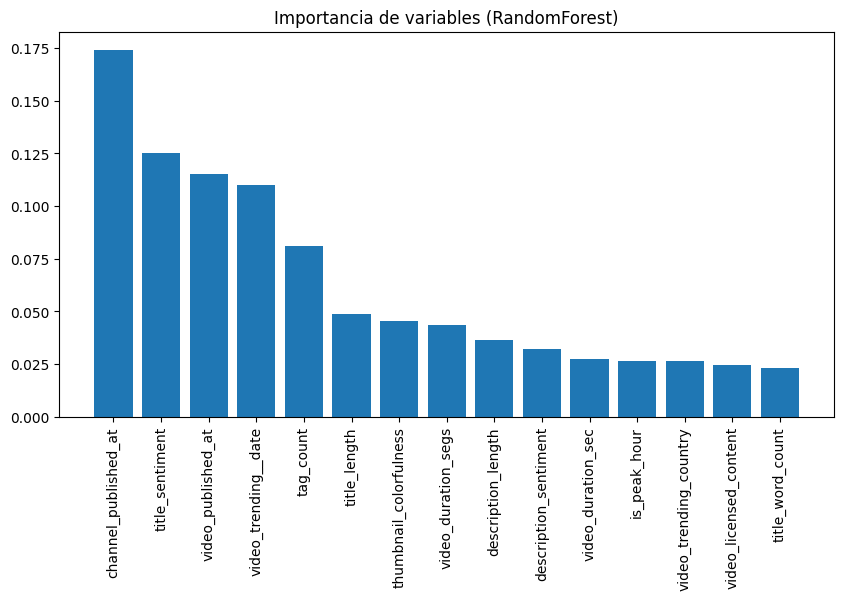

feature  importance
9     channel_published_at    0.174081
15         title_sentiment    0.124935
0       video_published_at    0.115193
1     video_trending__date    0.110057
21               tag_count    0.081049
11            title_length    0.048602
28  thumbnail_colorfulness    0.045269
29     video_duration_segs    0.043234
18      description_length    0.036516
19   description_sentiment    0.031833
22      video_duration_sec    0.027293
26            is_peak_hour    0.026476
2   video_trending_country    0.026308
8   video_licensed_content    0.024337
12        title_word_count    0.023009

In [37]:
# Importancia de variables para RandomForest (regresi√≥n)
import matplotlib.pyplot as plt
import pandas as pd

# Usar el mejor modelo disponible: si existe rf_search, usarlo; si no, entrenar un RandomForestRegressor b√°sico
try:
    model = rf_search.best_estimator_
except NameError:
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(random_state=42, n_jobs=-1)
    model.fit(X_train_reg, y_train_reg)

importances = model.feature_importances_
features = X_train_reg.columns
imp_df = pd.DataFrame({'feature': features, 'importance': importances}).sort_values('importance', ascending=False)
plt.figure(figsize=(10,5))
plt.bar(imp_df['feature'][:15], imp_df['importance'][:15])
plt.xticks(rotation=90)
plt.title('Importancia de variables (RandomForest)')
plt.show()
display(imp_df.head(15))